# **Masfudin Dwi Cahyo**

### **masfudindc@gmail.com**



---



# **Submission Dicoding**

## **Proyek Akhir : Klasifikasi Gambar**


---



# **Import Library**

In [2]:
# Install library tensorflow
!pip install tensorflow

In [3]:
# Import library yang diperlukan
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# **Load Data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data bertipe zip dengan library zipfile
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Dicoding/rockpaperscissors.zip', 'r') as zip:
  zip.extractall('/content/drive/MyDrive/Dicoding/rockpaperscissors')

# Tentukan path dataset
base_dir = '/content/drive/MyDrive/Dicoding/rockpaperscissors/rps-cv-images/'

# **Preprocessing**

In [ ]:
# Inisialisasi ImageDataGenerator untuk augmentasi gambar
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4  # Bagian ini menentukan persentase untuk validation set
)

# **Split Data**

In [ ]:
# Persiapan data train
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Persiapan data validation
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# **Membuat Model**

In [ ]:
# Inisialisasi model sequential
model = Sequential()

# Tambahkan layer-layer ke dalam model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# **Latih Model**

In [ ]:
# Training model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

# **Uji Model: Memprediksi Gambar yang Diunggah**

Saving 2UKnsncgPodQLOFR.png to 2UKnsncgPodQLOFR.png
1/1 [==============================] - 0s 19ms/step


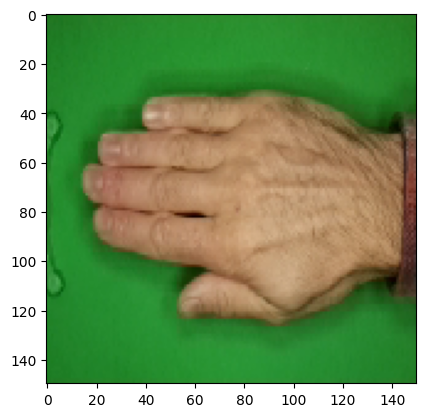

2UKnsncgPodQLOFR.png
paper


In [18]:
# Melakukan prediksi terhadap gambar yang di-upload

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    plt.imshow(img)
    plt.show()

    print(fn)
    if classes[0][0] == 1:
        print('paper')
    elif classes[0][1] == 1:
        print('rock')
    else:
        print('scissors')
